In [145]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys 
import os

# TODO: make more pythonic
# this line walks up file directory so rule-vetting is cwd
# Currently this breaks if chunk is run multiple times
os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))))
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/


In [194]:
import rulevetting.api.viz as viz
from rulevetting.projects.csi_pecarn.dataset import Dataset

In [195]:
dfs = Dataset().get_data(keep_na=True)

split_data kwargs {'control_types': ['ran', 'moi', 'ems']}
['ran', 'moi', 'ems']


In [196]:
eda_df = dfs[0]

In [197]:
posthoc_columns = [col for col in eda_df.columns if 'posthoc' in col]
eda_df.drop(posthoc_columns,axis=1,inplace=True)

In [198]:
print(list(eda_df.shape))

[1956, 62]


In [199]:
outcome_def = 'csi_injury'

In [200]:
eda_df.columns

Index(['AlteredMentalStatus', 'LOC', 'FocalNeuroFindings', 'PainNeck',
       'PosMidNeckTenderness', 'TenderNeck', 'Torticollis', 'SubInj_Head',
       'SubInj_Face', 'SubInj_Ext', 'SubInj_TorsoTrunk', 'Predisposed',
       'HighriskDiving', 'HighriskFall', 'HighriskHanging', 'HighriskHitByCar',
       'HighriskMVC', 'HighriskOtherMV', 'AxialLoadAnyDoc', 'axialloadtop',
       'Clotheslining', 'CervicalSpineImmobilization', 'GCSEye', 'MotorGCS',
       'VerbalGCS', 'TotalGCS', 'PtCompPainFace', 'PtCompPainHead',
       'PtTenderNeck', 'PtTenderFace', 'PtTenderHead', 'PassRestraint',
       'Assault', 'ChildAbuse', 'csi_injury', 'EMSArrival', 'NonAmbulatory',
       'AVPUDetails_AVPU_A', 'AVPUDetails_AVPU_P', 'AVPUDetails_AVPU_U',
       'AVPUDetails_AVPU_V', 'AVPUDetails_AVPU_nan',
       'ReceivedInTransfer_binary', 'PtAmbulatoryPriorArrival_binary',
       'ArrPtIntub_binary', 'PtCompPainNeckMove_binary',
       'CervicalSpineImmobilization_outside_binary', 'helmet_binary',
       '

In [201]:
# get list of columns with only two recorded outcomes
binary_columns = eda_df.columns[eda_df.nunique()==2]
binary_eda_data = eda_df.loc[:,binary_columns].copy() 

cont_columns = eda_df.columns[eda_df.nunique()!=2]
cont_eda_data = eda_df.loc[:,cont_columns].copy()
cont_eda_data.loc[:,outcome_def] = eda_df.loc[:,outcome_def].copy() #add binary outcome indicator back in

/usr/local/linux/anaconda3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2819: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


In [202]:
# outcome indicator is double counted
print(eda_df.shape)
print(binary_eda_data.shape)
print(cont_eda_data.shape)

(1956, 62)
(1956, 58)
(1956, 5)


In [203]:
print(cont_eda_data.head())

                                  GCSEye  MotorGCS  VerbalGCS  TotalGCS  \
id     case_id site control_type                                          
110009 110009  1    case             NaN       NaN        NaN       NaN   
110017 110017  1    case             4.0       6.0        5.0      15.0   
110001 110001  1    case             1.0       1.0        1.0       3.0   
110019 110019  1    case             4.0       6.0        5.0      15.0   
110012 110012  1    case             NaN       NaN        NaN       NaN   

                                  csi_injury  
id     case_id site control_type              
110009 110009  1    case                 1.0  
110017 110017  1    case                 1.0  
110001 110001  1    case                 1.0  
110019 110019  1    case                 1.0  
110012 110012  1    case                 1.0  


In [204]:
print(np.unique(eda_df.index.get_level_values('control_type')))

['case' 'ems' 'moi' 'ran']


# Summary EDA

In [205]:
eda_df.describe()

,AlteredMentalStatus,LOC,FocalNeuroFindings,PainNeck,PosMidNeckTenderness,TenderNeck,Torticollis,SubInj_Head,SubInj_Face,SubInj_Ext,...,Musculoskeletal_binary,Neurological_binary,Medications_binary,Xrays_outside_binary,CTPerformed_outside_binary,MRIPerformed_outside_binary,NonVerbal,YoungAdult,HighRiskFallDownStairs,PainNeck_Robust
count,1912.000000,1798.000000,1757.000000,1853.000000,1906.000000,1906.000000,1820.000000,1936.000000,1936.000000,1936.000000,...,1525.000000,1525.000000,1525.000000,128.000000,128.000000,134.000000,1956.000000,1956.000000,1956.000000,1956.000000
mean,0.186715,0.389321,0.111554,0.356719,0.292760,0.380378,0.056593,0.126550,0.045971,0.099690,...,0.076721,0.133115,0.308852,0.539062,0.367188,0.037313,0.193763,0.458078,0.019427,0.349182
std,0.389785,0.487732,0.314906,0.479160,0.455148,0.485607,0.231128,0.332554,0.209476,0.299664,...,0.266236,0.339810,0.462172,0.500430,0.483932,0.190240,0.395346,0.498367,0.138057,0.476833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
binary_imputed_data = binary_eda_data.fillna(0)
print(binary_eda_data.shape, binary_imputed_data.shape)
binary_corrs = binary_imputed_data.corr(method='spearman')
cont_corrs = cont_eda_data.corr(method='spearman')

print(cont_corrs)

(1956, 58) (1956, 58)
              GCSEye  MotorGCS  VerbalGCS  TotalGCS  csi_injury
GCSEye      1.000000  0.809397   0.773794  0.835138   -0.164932
MotorGCS    0.809397  1.000000   0.851174  0.881708   -0.209219
VerbalGCS   0.773794  0.851174   1.000000  0.943086   -0.197890
TotalGCS    0.835138  0.881708   0.943086  1.000000   -0.197349
csi_injury -0.164932 -0.209219  -0.197890 -0.197349    1.000000


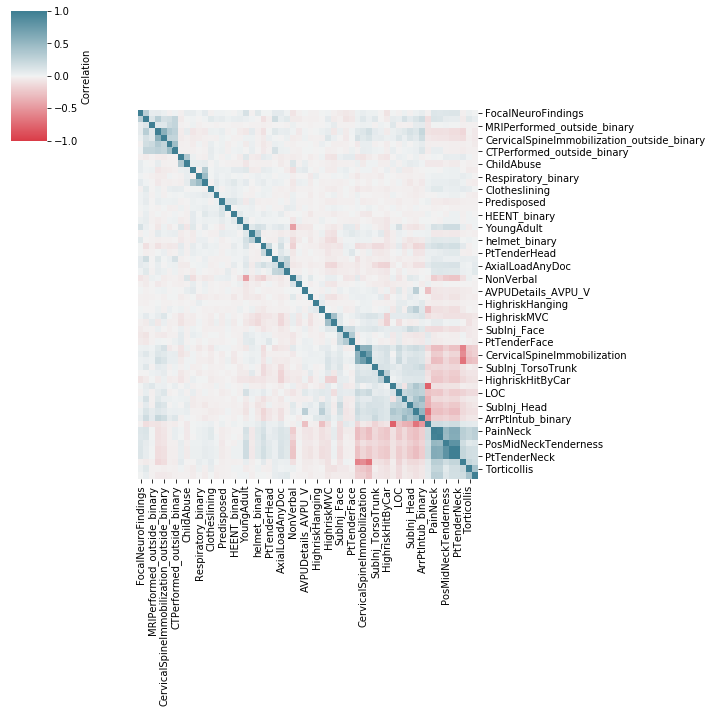

In [217]:
binary_corrmap = sns.clustermap(binary_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
binary_corrmap.ax_row_dendrogram.set_visible(False)
binary_corrmap.ax_col_dendrogram.set_visible(False)

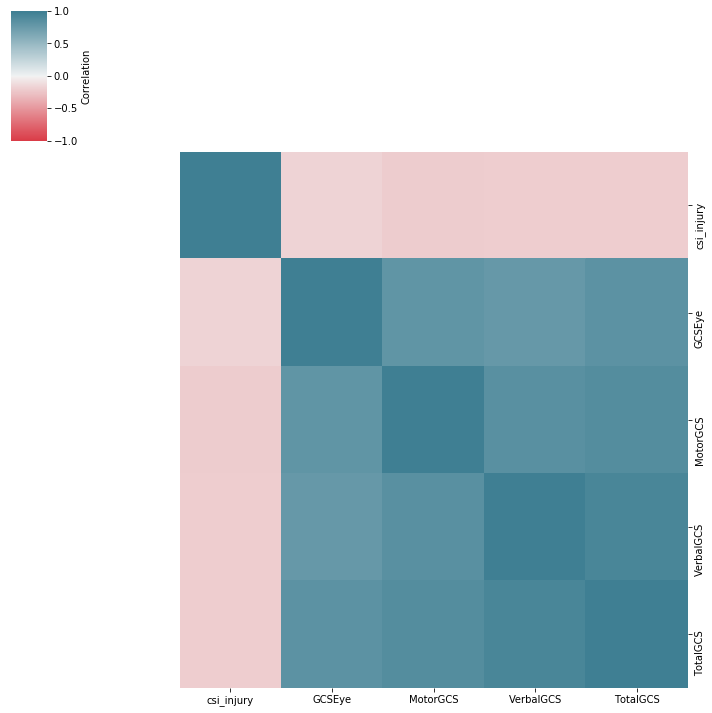

In [218]:
cont_corrmap = sns.clustermap(cont_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
cont_corrmap.ax_row_dendrogram.set_visible(False)
cont_corrmap.ax_col_dendrogram.set_visible(False)

In [220]:
plt.figure(dpi=250, figsize=(4, 7))
#vals = binary_corrs[outcome_def]
vals = binary_corrs['GCSnot15']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:20], vals[args][:20])
plt.xlabel('Correlation w/ GCS Missing')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Bottom 20 Correlations")
plt.show()

KeyError: 'GCSnot15'

<Figure size 1000x1750 with 0 Axes>

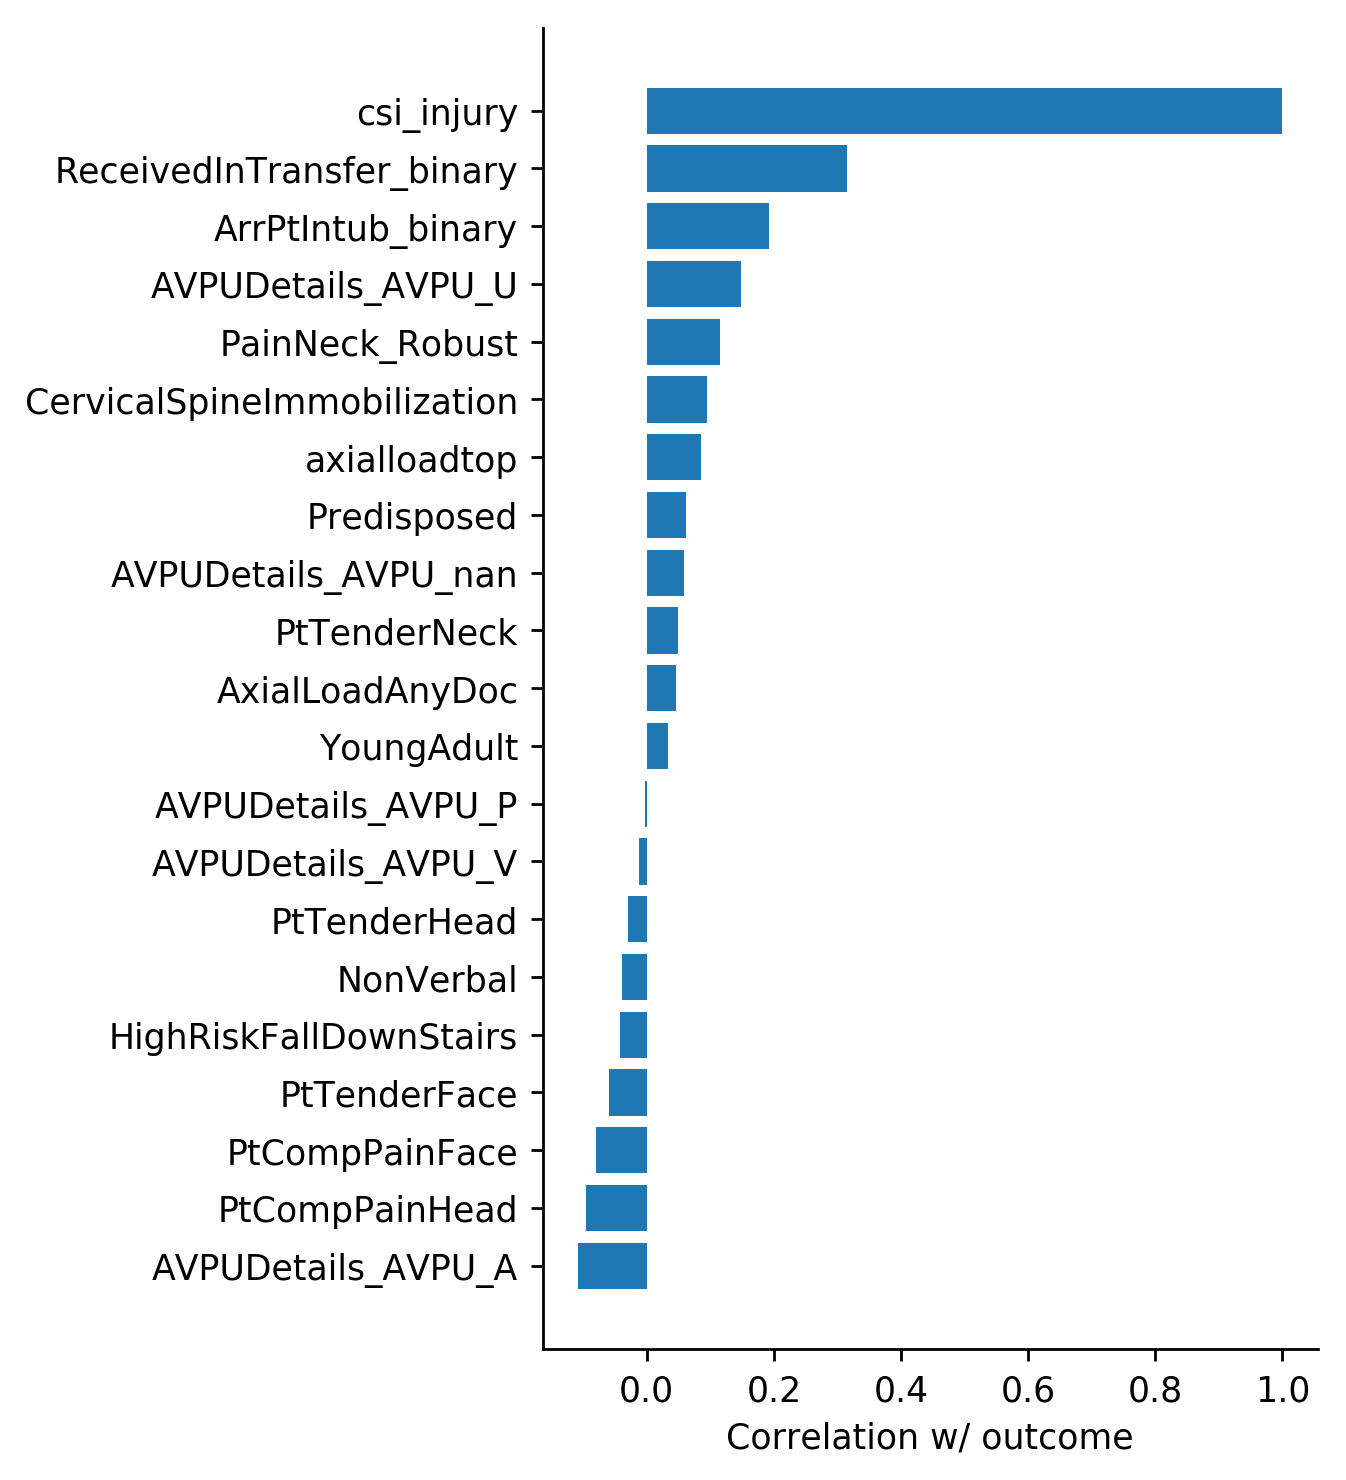

In [211]:
plt.figure(dpi=250, figsize=(4, 7))
vals = binary_corrs['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:25], vals[args][:25])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [212]:
confusion_matrix = pd.crosstab(binary_gcs_data['AlteredMentalStatus'], binary_gcs_data['AVPUDetails_AVPU_A'], rownames=['AlteredMentalStatus'], colnames=['GCS=15'])

sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix for GCS Imputation from AVPU=A")
plt.show()


KeyError: 'AlteredMentalStatus'

In [213]:
print(eda_df['TotalGCS'])

id       case_id  site  control_type
110009   110009   1     case             NaN
110017   110017   1     case            15.0
110001   110001   1     case             3.0
110019   110019   1     case            15.0
110012   110012   1     case             NaN
110010   110010   1     case            15.0
110014   110014   1     case             NaN
110002   110002   1     case            15.0
110022   110022   1     case            10.0
110006   110006   1     case            15.0
110003   110003   1     case            15.0
110013   110013   1     case             NaN
110016   110016   1     case            15.0
110004   110004   1     case             NaN
140128   110020   1     ran             14.0
140141   110023   1     ran              NaN
140127   110012   1     ran             15.0
140144   110024   1     ran              NaN
140125   110006   1     ran              NaN
140138   110002   1     ran             15.0
140113   110003   1     ran             15.0
140120   110019   

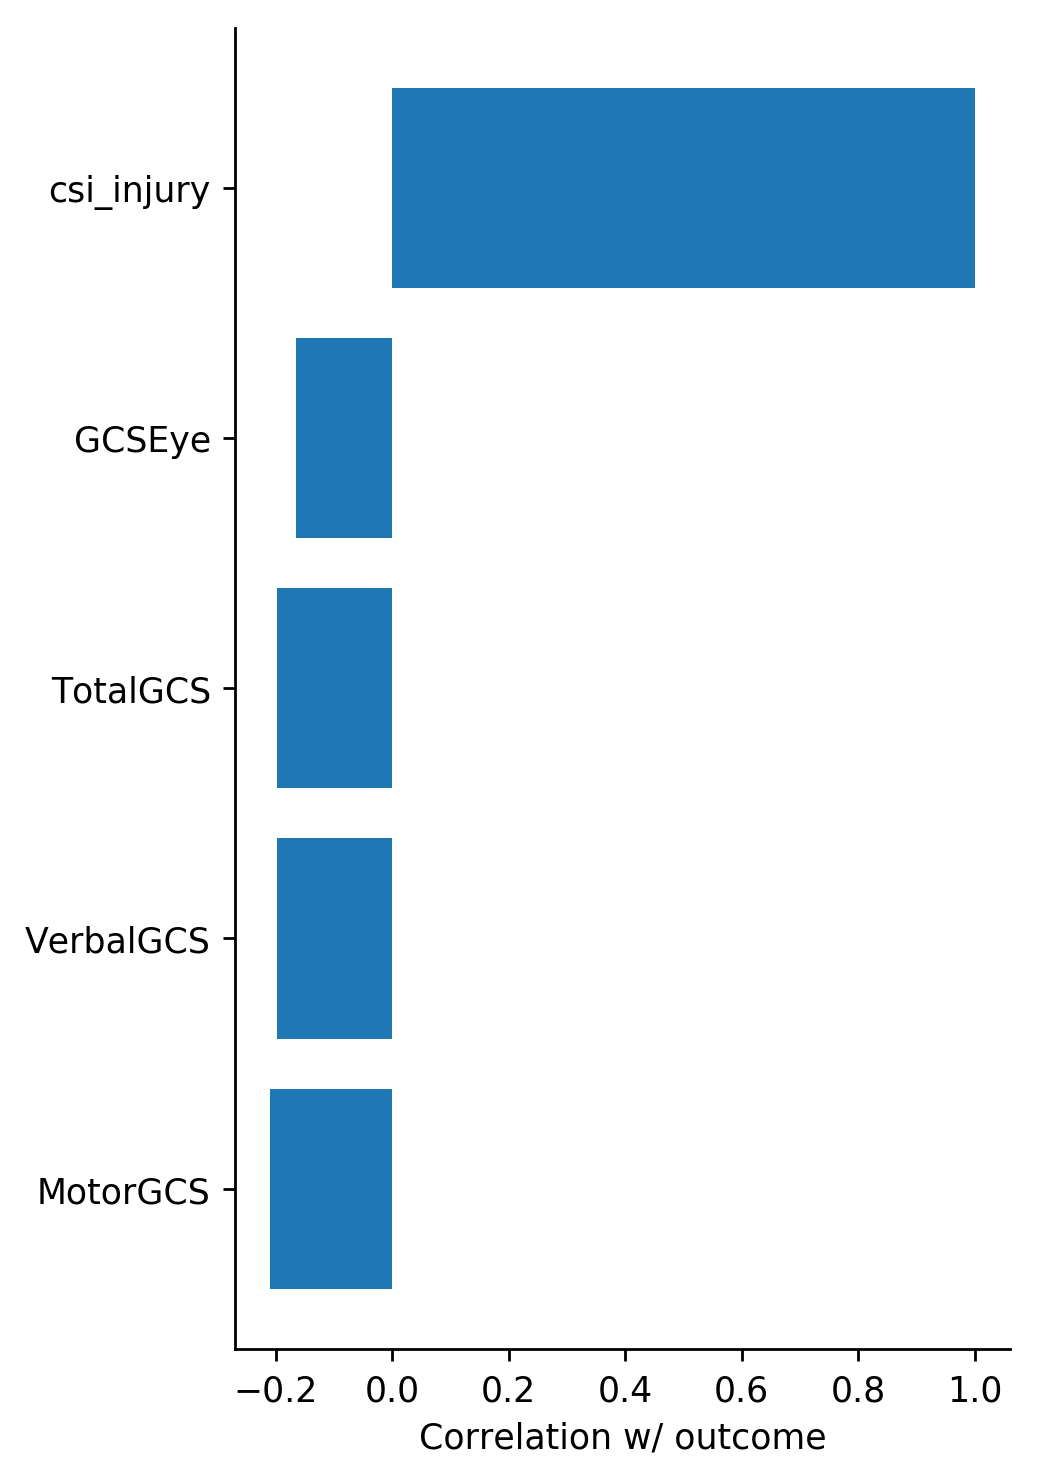

In [214]:
plt.figure(dpi=250, figsize=(4, 7))
vals = cont_corrs[outcome_def]
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs, vals[args])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [215]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(binary_corrs['GCS_NA_total'].sort_values())

KeyError: 'GCS_NA_total'

# EDA of Missingness

In [ ]:
# get percent missing by column
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("25 Covariates with Highest Percent Missingness\n")
print("All Covariates:")
missing_frac = (eda_df.isna().sum() / eda_df.shape[0]) * 100
print(missing_frac.sort_values(ascending=False)[:])

In [ ]:
complete_binary_covar = binary_columns[bin_missing_frac==0]
print("Binary covar. with no missing data:",len(complete_binary_covar))

missing_columns = binary_columns[bin_missing_frac!=0]
print("Binary covar. with some missing data:",len(missing_columns))

In [ ]:
binary_missing_bools = binary_eda_data[missing_columns].isna()
binary_missing_corrs = binary_missing_bools.corr(method='spearman')

In [ ]:
corrmap = sns.clustermap(binary_missing_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)

In [ ]:
print(max(binary_missing_corrs))

In [ ]:
print(sorted(binary_missing_corrs.iloc[:,3]))

# EDA of Demographic Data

In [ ]:
eda_demographic_df = pd.read_csv("data/csi_pecarn/raw/demographics.csv").set_index(["studysubjectid"])
print(eda_demographic_df.columns)

In [ ]:
gender_df = eda_demographic_df.groupby('site')['Gender'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Gender Variable Across Study Sites')
gender_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
race_df = eda_demographic_df.groupby('site')['Race'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Race Variable Across Study Sites')
race_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
ethnicity_df = eda_demographic_df.groupby('site')['Ethnicity'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Ethnicity Variable Across Study Sites')
ethnicity_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
payor_df = eda_demographic_df.groupby('site')['PayorType'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Payor Type Across Study Sites')
payor_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
age_df = eda_demographic_df[['site','AgeInYears']]


bins = [0, 2, 5, 10, 13, np.inf]
names = ['<2', '2-5', '5-10', '10-13', '13+']

age_df.loc[:,['AgeBin']] = pd.cut(age_df.loc[:,'AgeInYears'], bins, labels=names)

age_range_df = age_df.groupby('site')['AgeBin'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Age Range Across Study Sites')
age_range_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()
